In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/Retail_Dataset.csv')
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:

columns = data.columns.tolist()
data.columns = [x.lower().replace(' ','').replace(r'(%)' , '')  for x in columns]
data.head()

,customerid,productid,quantity,price,transactiondate,paymentmethod,storelocation,productcategory,discountapplied,totalamount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [4]:
data.isnull().sum() / data.shape[0] * 100

customerid         0.0
productid          0.0
quantity           0.0
price              0.0
transactiondate    0.0
paymentmethod      0.0
storelocation      0.0
productcategory    0.0
discountapplied    0.0
totalamount        0.0
dtype: float64

In [5]:
data.duplicated().sum()

0

In [6]:
data.transactiondate = pd.to_datetime(data.transactiondate)

In [7]:
year = pd.to_datetime(data.transactiondate).dt.year
data.insert(5, 'year' , year)
data.head()

,customerid,productid,quantity,price,transactiondate,year,paymentmethod,storelocation,productcategory,discountapplied,totalamount
0,109318,C,7,80.079844,2023-12-26 12:32:00,2023,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,2023-08-05 00:00:00,2023,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,2024-03-11 18:51:00,2024,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,2023-10-27 22:00:00,2023,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,2023-12-22 11:38:00,2023,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [8]:
#GET MONTH & MONTH NAME FROM TRANSACTION DATE
month_name = pd.to_datetime(data.transactiondate).dt.month_name()
month = pd.to_datetime(data.transactiondate).dt.month
data.insert(5, 'month' , month)
data.insert(5, 'monthname' , month_name)
data.head()

,customerid,productid,quantity,price,transactiondate,monthname,month,year,paymentmethod,storelocation,productcategory,discountapplied,totalamount
0,109318,C,7,80.079844,2023-12-26 12:32:00,December,12,2023,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,2023-08-05 00:00:00,August,8,2023,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,2024-03-11 18:51:00,March,3,2024,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,2023-10-27 22:00:00,October,10,2023,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,2023-12-22 11:38:00,December,12,2023,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [9]:
actualprice = round(data.price * data.quantity,0).astype(int)
data.insert(12  , 'actualprice' , actualprice)

In [10]:
#DOESNT USEFULL
data = data.drop(columns = ['storelocation'])

In [11]:
monthly_transac_amount = (
    data.groupby(['year','month','monthname'] , as_index = False)
    .agg({'totalamount':'sum'})
    .sort_values(['year','month'] , ascending = [True,True])
)


monthly_transac_amount.totalamount = round(monthly_transac_amount.totalamount / 1000000,2)
monthly_transac_amount

,year,month,monthname,totalamount
0,2023,4,April,0.06
1,2023,5,May,2.10
2,2023,6,June,2.07
3,2023,7,July,2.13
4,2023,8,August,2.11
5,2023,9,September,2.05
6,2023,10,October,2.05
7,2023,11,November,2.05
8,2023,12,December,2.13
9,2024,1,January,2.13


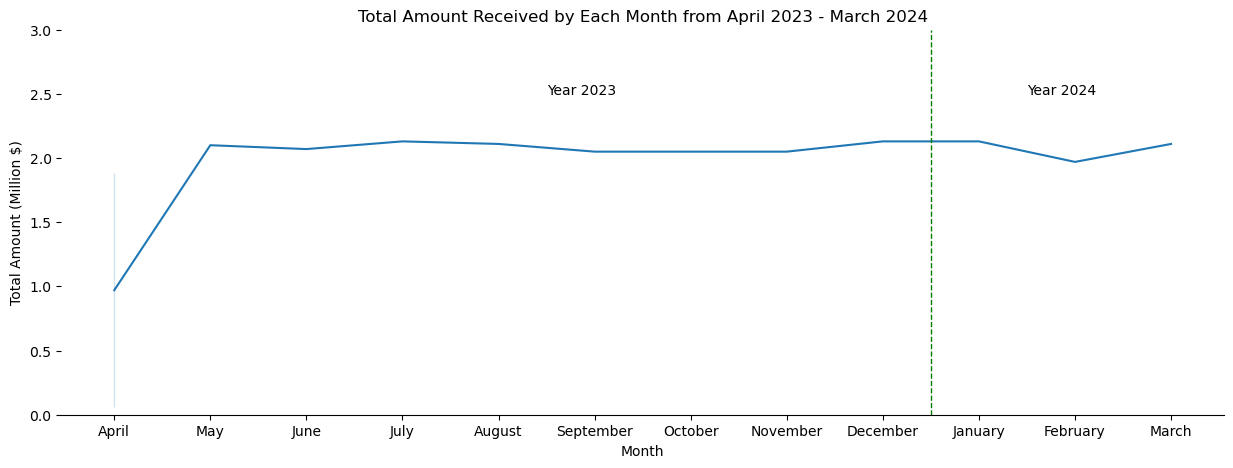

In [12]:
sns.lineplot(
    data = monthly_transac_amount
    ,x = 'monthname'
    ,y = 'totalamount'
)


plt.title('Total Amount Received by Each Month from April 2023 - March 2024')
plt.ylabel('Total Amount (Million $)')
plt.xlabel('Month')
plt.ylim([0, 3.0])

plt.vlines(x=8.5, ymin=0, ymax=3.0 ,  colors='g', ls='--', lw=1, label='vline_single - partial height')
plt.text(4.5, 2.5 , 'Year 2023', horizontalalignment='left', size='medium', color='black')
plt.text(9.5, 2.5 , 'Year 2024', horizontalalignment='left', size='medium', color='black')

plt.gca().spines[['top','right','left']].set_visible(False)

plt.show()

### Amount Product Purchased by Each Month

In [13]:
monthly_item_count = (
    data.groupby(['year','month','monthname','productcategory'] , as_index = False)
    .agg({'quantity':'sum'})
    .sort_values(['year','month','productcategory'] , ascending = [True,True,False])
)
monthly_item_count.head()

,year,month,monthname,productcategory,quantity
3,2023,4,April,Home Decor,278
2,2023,4,April,Electronics,327
1,2023,4,April,Clothing,316
0,2023,4,April,Books,319
7,2023,5,May,Home Decor,10298


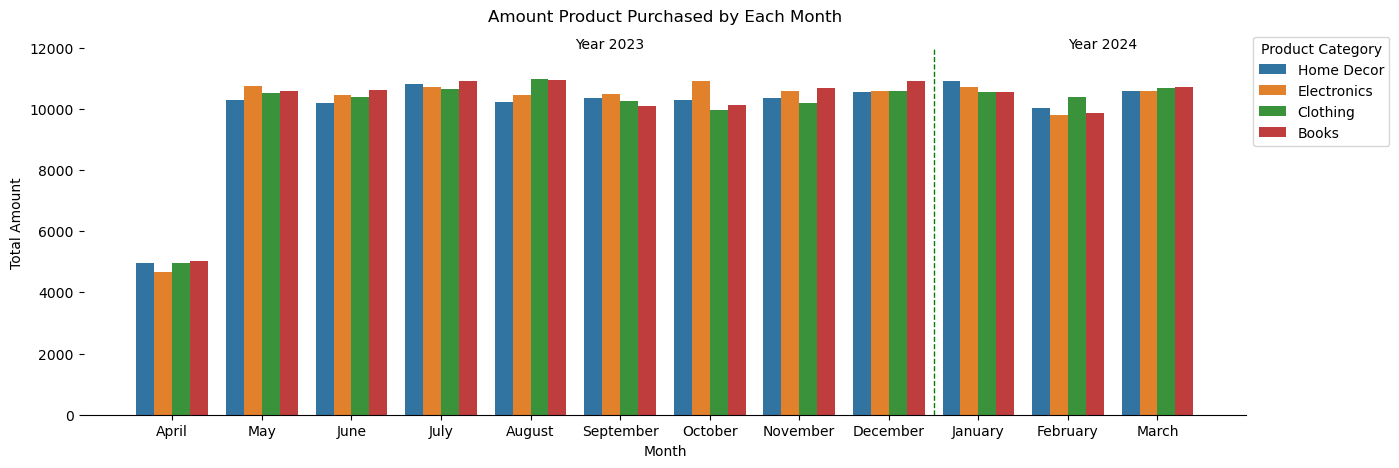

In [14]:
sns.barplot(
    data = monthly_item_count
    ,x = 'monthname'
    ,y = 'quantity'
    ,hue = 'productcategory',
    errcolor= 'none'
    
)


plt.gca().spines[['top','right','left']].set_visible(False)


plt.legend(bbox_to_anchor=(1, 1) , title = 'Product Category')

plt.ylabel('Total Amount')
plt.xlabel('Month')
plt.title('Amount Product Purchased by Each Month')

#plt.ylim([0,2500])

plt.vlines(x=8.5, ymin=0, ymax=monthly_item_count.quantity.max() + 1000 ,  colors='g', ls='--', lw=1, label='vline_single - partial height')
plt.text(4.5, monthly_item_count.quantity.max() + 1000 , 'Year 2023', horizontalalignment='left', size='medium', color='black')
plt.text(10, monthly_item_count.quantity.max() + 1000, 'Year 2024', horizontalalignment='left', size='medium')
plt.show()

##### - Each products contributed significantly towards each total monthly amount

### Total Amount Discounted

In [15]:
data['totaldiscounted'] = data.actualprice - data.totalamount

In [16]:
monthly_discount_transac_amount = (
    data.groupby(['year','month','monthname','productcategory'] , as_index = False)
    .agg({'totaldiscounted':'sum'})
    .sort_values(['year','month'] , ascending = [True,True])
)


monthly_discount_transac_amount.totaldiscounted = round(monthly_discount_transac_amount.totaldiscounted / 1000,3)
monthly_discount_transac_amount.head(10)

,year,month,monthname,productcategory,totaldiscounted
0,2023,4,April,Books,1.743
1,2023,4,April,Clothing,1.722
2,2023,4,April,Electronics,1.736
3,2023,4,April,Home Decor,1.538
4,2023,5,May,Books,57.998
5,2023,5,May,Clothing,58.703
6,2023,5,May,Electronics,59.714
7,2023,5,May,Home Decor,56.633
8,2023,6,June,Books,57.323
9,2023,6,June,Clothing,58.189


In [17]:
(
    monthly_discount_transac_amount.groupby('productcategory')
    .agg({'totaldiscounted':'mean'})
    .sort_values('totaldiscounted' , ascending = False)
)

,totaldiscounted
productcategory,
Books,53.642462
Clothing,53.206615
Home Decor,52.958769
Electronics,52.758615


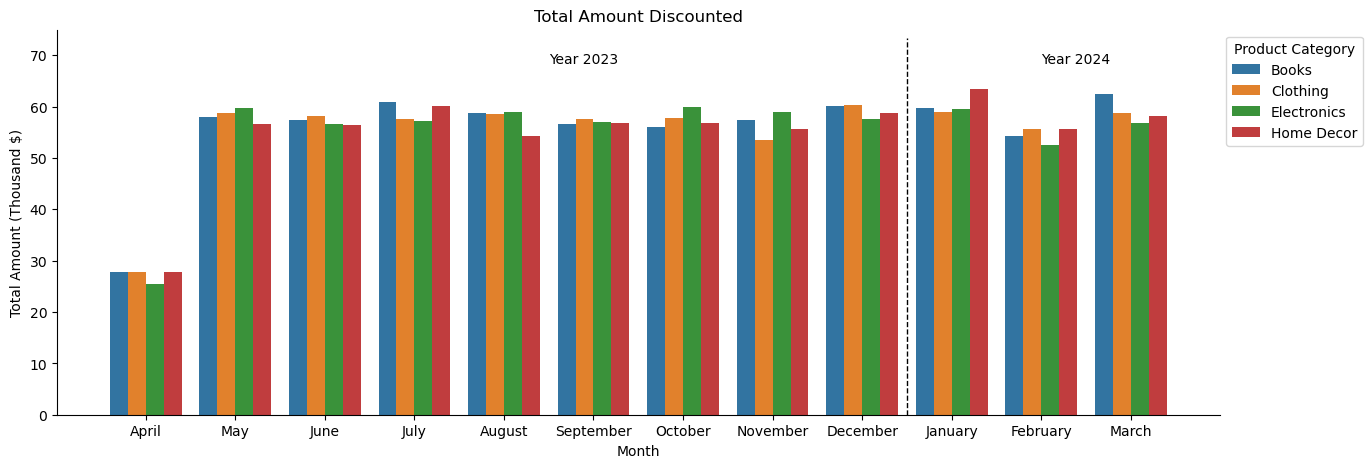

In [18]:
sns.barplot(
    data = monthly_discount_transac_amount
    ,x = 'monthname'
    ,y = 'totaldiscounted'
    ,hue = 'productcategory'
    ,errcolor='none'
)

plt.ylim([0,75])

plt.legend(bbox_to_anchor=(1, 1) , title = 'Product Category')

plt.vlines(x=8.5, ymin=0, ymax=monthly_discount_transac_amount.totaldiscounted.max() + 10,  colors='k', ls='--', lw=1, label='vline_single - partial height')
plt.text(4.5, monthly_discount_transac_amount.totaldiscounted.max() + 5, 'Year 2023', horizontalalignment='left', size='medium', color='black')
plt.text(10, monthly_discount_transac_amount.totaldiscounted.max() + 5, 'Year 2024', horizontalalignment='left', size='medium', color='black')

plt.xlabel('Month')
plt.ylabel('Total Amount (Thousand $)')
plt.title('Total Amount Discounted')


plt.gca().spines[['top','right']].set_visible(False)
plt.show()

### payment method 

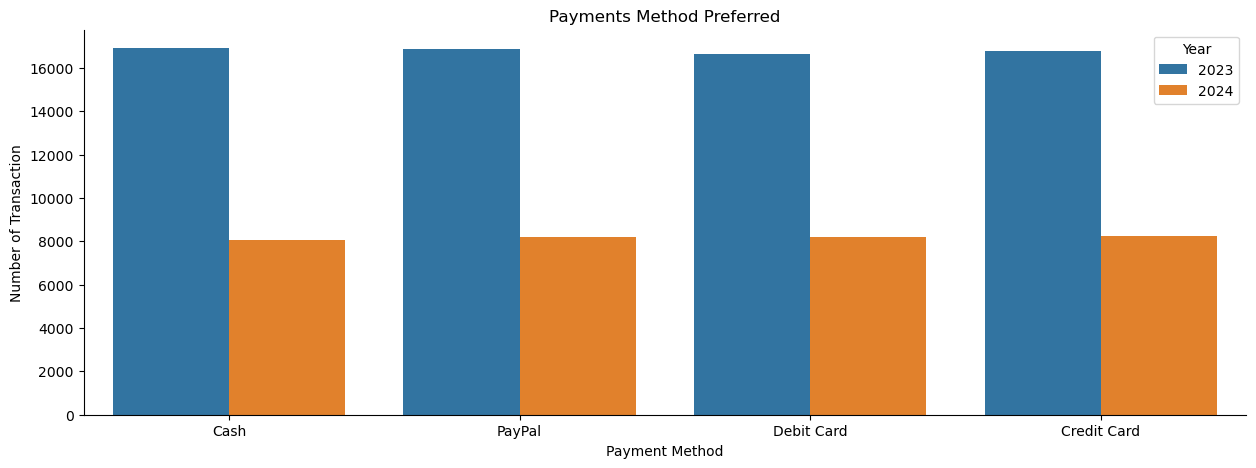

In [19]:
sns.countplot(
    data = data
    ,x = 'paymentmethod'
    ,hue = 'year'
)


plt.gca().spines[['top','right']].set_visible(False)
plt.title('Payments Method Preferred')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transaction')

plt.legend(bbox_to_anchor=(1, 1) , title = 'Year')

plt.show()

#### There's no favourable payment method. All 4 methods seems to have the same amount of usage from April 2023 - March 2024

In [20]:
product_amount = (
    data.groupby('productcategory' , as_index = False)
    .agg({'totalamount':'sum'})
    .sort_values('totalamount' , ascending = False)
)
product_amount

,productcategory,totalamount
0,Books,6.257837e+06
1,Clothing,6.205502e+06
2,Electronics,6.196735e+06
3,Home Decor,6.173421e+06


### Product total amount by product category

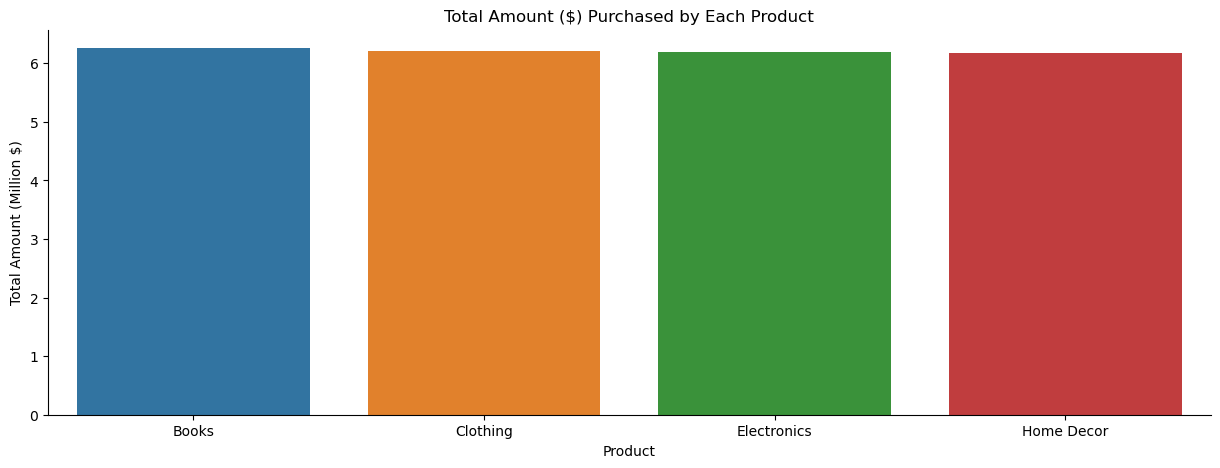

In [21]:
product_amount.totalamount = round(product_amount.totalamount / 1000000,2)
sns.barplot(
    data = product_amount
    ,x = 'productcategory'
    ,y = 'totalamount'
)


plt.title('Total Amount ($) Purchased by Each Product')
plt.xlabel('Product')
plt.ylabel('Total Amount (Million $)')

plt.gca().spines[['top','right']].set_visible(False)
plt.show()


